**2022-1 ML 과제**

작성자 : 김상회

Machine Learning 과제는 이전 교육세션에서 배운 "FE"와 "ML"을 사용하여, 타이타닉 생존 여부를 예측하는 분류 문제에서 직접 모델링 하고 제출까지 해보는 과제 입니다.  
  
코드는 기초적인 전처리와 Decision Tree를 사용하여 예측을 진행합니다. 필수는 아니지만 주어진 코드 이외에도 다른 모델과 방법들을 자율적으로 사용하여 성능을 높여보시기를 추천드립니다.  
  
과제하시면서 질문 있으신 분들은 언제든 질문방 or 개인톡으로 연락주세요 :)  
+) Ctrl + F에서 "TODO"를 찾고 순차적으로 진행하세요

In [2]:
import pandas as pd
import numpy as np

# 데이터셋 로드

In [3]:
train = pd.read_csv('/Users/jugjug/Desktop/2017147009/공부/와이빅타/ML1/train_titanic.csv', index_col=0)
test = pd.read_csv('/Users/jugjug/Desktop/2017147009/공부/와이빅타/ML1/test_titanic.csv', index_col=0)
submission = pd.read_csv('/Users/jugjug/Desktop/2017147009/공부/와이빅타/ML1/submission.csv')

In [5]:
# local 사용

# train = pd.read_csv('train_titanic.csv')
# test = pd.read_csv('test_titanic.csv')
# submission = pd.read_csv('submission.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


# 간단한 전처리

## 결측치 Drop  
결측치가 있는 column은 drop하도록 하겠습니다. 성능을 높이기 위해 drop하지 않고 다른 방법을 사용할 수 있습니다.  
ex) Embarked는 두명만 결측치인데 해당 값을 채워주는 방식

In [9]:
#결측치의 수
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_dropna = train.drop(columns=["Age", "Cabin", "Embarked"])

## 카테고리 변수  

In [11]:
# object 변수 찾기
train_dropna.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
dtype: object

In [12]:
# object 변수 안에 몇개의 값이 존재하는 지 -> nunique() 사용
train_dropna[["Name", "Sex", "Ticket"]].nunique()

Name      891
Sex         2
Ticket    681
dtype: int64

In [13]:
# Name과 Ticket은 수가 많기 때문에 drop하고 Sex는 남녀 두개이기 때문에 더미화 진행합니다.
train_object = train_dropna.drop(columns=["Name", "Ticket"])
train_object = pd.get_dummies(train_object, columns=["Sex"]) # 더미화 진행 -> pd.get_dummiex()
train_object.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
0,1,0,3,1,0,7.2500,0,1
1,2,1,1,1,0,71.2833,1,0
2,3,1,3,0,0,7.9250,1,0
3,4,1,1,1,0,53.1000,1,0
4,5,0,3,0,0,8.0500,0,1


# Train Valid Split  
전처리가 끝난 Train Set을 검증을 위한 Validation Set으로 나눠줍니다.

In [14]:
# X와 y 설정
target = "Survived"
X = train_object.drop(columns=[target])
y = train_object[target]

In [15]:
# Train Test Split
from sklearn.model_selection import train_test_split

# TODO 1)
# X와 y를 train valid로 split 하세요
# test size는 0.2, random state는 616, stratify는 y로 설정하세요

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=616,stratify=y)

In [16]:
print(f"X_train shape : {X_train.shape}, X_valid shape : {X_valid.shape}")

X_train shape : (712, 7), X_valid shape : (179, 7)


In [17]:
# train과 valid의 y값 비율이 같아야 함

print(y_train.value_counts(normalize=True))
print(y_valid.value_counts(normalize=True))

0    0.616573
1    0.383427
Name: Survived, dtype: float64
0    0.614525
1    0.385475
Name: Survived, dtype: float64


# 모델 학습  
기본 Decision Tree를 사용하여 생존 여부를 예측하고 Grid Search를 사용하였을 때와 Validation Set에서의 성능을 비교합니다.

## 기본 DT

In [18]:
# 기본 Decision Tree 예측
from sklearn.tree import DecisionTreeClassifier

# 모델 선언
dt = DecisionTreeClassifier() 

# 모델 학습
# TODO 2) 모델을 train 데이터에 맞춰 학습(fit)시키세요
dt.fit(X_train,y_train)

# Validation Set에 예측
# TODO 3) 학습한 모델로 valid 값을 예측하세요
pred_valid = dt.predict(X_valid)

In [19]:
# 모델 예측 성능을 검증하기 위해 confusion matrix와 Accuracy, f1 score를 확인합니다.

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# confusion matrix
matrix = confusion_matrix(y_valid, pred_valid)
print(matrix)

# Accuracy
acc = accuracy_score(y_valid, pred_valid)
print('Accuracy: {:.2f}'.format(acc))

# f1 score
f1 = f1_score(y_valid, pred_valid)
print('F1_Score: {:.2f}'.format(f1))

[[85 25]
 [20 49]]
Accuracy: 0.75
F1_Score: 0.69


## Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV
grid_dt = DecisionTreeClassifier()

# TODO 4)
# 테스트 하고 싶은 parameter 값들을 parameter 별로 sequence 구조의 데이터(list, numpy array, etc...)에 넣어줍니다.
# 이 때 변수 이름은 꼭 모델 parameter 이름과 동일할 필요는 없습니다.

max_depth = [2,3,4,5,6,7,8]
max_leaf = [5,10,15,20,25,30,35,40]

#위의 세 parameter를 하나로 묶기 위해서 다음과 같은 Dictionary 형태로 만들어줍니다.
#여기서 key 값은 str 형태로, 정확하게 모델 parameter 이름과 동일해야 합니다.

parameter_grid = {'max_depth': max_depth,
                  'max_leaf_nodes': max_leaf}

In [21]:
gs = GridSearchCV(estimator= grid_dt, param_grid= parameter_grid) 
gs.fit(X_train, y_train) 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40]})

In [22]:
print('GridSearch 최적 parameter: {}'.format(gs.best_params_),
      'GridSearch 최고 Validation Score: {:.3f}'.format(gs.best_score_), sep = '\n')

GridSearch 최적 parameter: {'max_depth': 3, 'max_leaf_nodes': 10}
GridSearch 최고 Validation Score: 0.798


In [23]:
# Grid Search로 찾은 최적의 파라미터 값으로 모델 생성
# TODO 5)
dt_grid = DecisionTreeClassifier(max_depth=3 , max_leaf_nodes=10 ) 

dt_grid.fit(X_train, y_train) 
pred_valid_grid = dt_grid.predict(X_valid)

In [24]:
# 모델 예측 성능을 검증하기 위해 confusion matrix와 Accuracy, f1 score를 확인합니다.

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# confusion matrix
matrix = confusion_matrix(y_valid, pred_valid_grid)
print(matrix)

# Accuracy
acc = accuracy_score(y_valid, pred_valid_grid)
print('Accuracy: {:.2f}'.format(acc))

# f1 score
f1 = f1_score(y_valid, pred_valid_grid)
print('F1_Score: {:.2f}'.format(f1))

[[101   9]
 [ 19  50]]
Accuracy: 0.84
F1_Score: 0.78


In [25]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [26]:
from sklearn.tree import export_graphviz

# 결과물을 graphviz 패키지의 default 경로로 export할 겁니다.



export_graphviz(dt_grid,
                out_file=("heart_tree.dot"),
                feature_names=X_train.columns,
                class_names=['0','1'],
                rounded=True,
                filled=True)

In [27]:
os.pathsep

':'

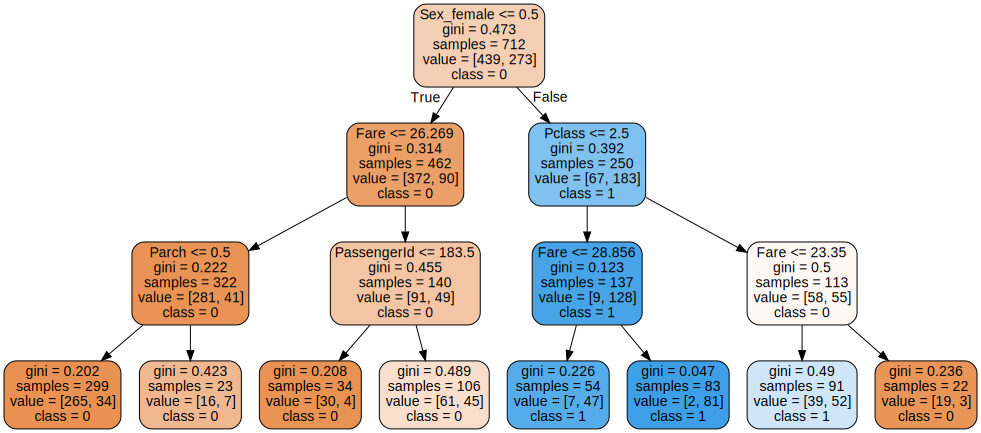

In [36]:
import graphviz
import os

with open('heart_tree.dot') as f:
    dot_graph = f.read()
src = graphviz.Source(dot_graph)
src

# Test Data 예측

## 전처리  
예측을 진행하기에 앞서 train에서 진행한 전처리 과정을 동일하게 적용해야 합니다.  
전처리 방법이 달라질 경우 결과도 다르게 나옵니다!  
(전처리 과정을 pipeline으로 만들어서 진행하기도 함 --> "전처리 pipeline" 검색)

### 결측치 Drop  
Drop ["Age", "Cabin", "Embarked"] Columns

In [29]:
test_dropna = test.drop(columns=["Age", "Cabin", "Embarked"])

### 카테고리 변수  

In [30]:
# Name과 Ticket은 수가 많기 때문에 drop하고 Sex는 남녀 두개이기 때문에 더미화 진행합니다.
test_object = test_dropna.drop(columns=["Name", "Ticket"])
test_object = pd.get_dummies(test_object, columns=["Sex"]) # 더미화 진행 -> pd.get_dummiex()
test_object.head()

,PassengerId,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
0,892,3,0,0,7.8292,0,1
1,893,3,1,0,7.0000,1,0
2,894,2,0,0,9.6875,0,1
3,895,3,0,0,8.6625,0,1
4,896,3,1,1,12.2875,1,0


### 추가 결측치 전처리  
Fare 항목의 결측치가 존재하므로 해당 결측치를 처리해줘야함 -> train의 데이터는 Fare 행이 존재하기 때문에 drop 불가 -> 평균값으로 대체

In [31]:
test_object.isna().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
dtype: int64

In [32]:
test_fillna = test_object.fillna(test_object.mean()) # fillna(df.mean())을 사용하여 결측치 채우기

## 예측

In [33]:
pred = dt_grid.predict(test_fillna)

In [34]:
submission['Survived'] = pred
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [35]:
submission.to_csv('dt_submission.csv', index=False)

본인 깃헙 repository에 과제 코드와 제출한 화면 캡처본을 함께 업로드 해주세요.